# Measuring things

Any measurement is subject to uncertainty, which might be negibible or not. This can apply to counting votes in race for presidency or star counts. Statistics deals with these uncertainties trying to make out the most of the data. That is, it is a descipline which concerns the collection, organization, analysis, interpretation and presentation of data. Before we dive in detail, let's play a bit with the data. Here we will be using _Python_, and in particular, _scipy.stats_ module. Note that this is just one of the options available, and you could, in fact, even implement same functionality yourself. Moreover, _scipy.stats_ is also not optimal solution in many cases, however, it follows consistent syntax, so we will use it here. Other packages of interest are _astroML_ and _scikits.statsmodels_ (not covered here). So, using a python module always starts with importing it. You can then explore various functionality by looking through documentation. Here I import also _pylab_ module for plotting and _numpy_ module to work with arrays easily.

## Basic descriptive statistics 

Let us generate some data. In this case N points drawn from two a normal distribution. Play with N, loc, scale parameters to see how it affects the results. Normal distribution is pretty important!

In [13]:
# We want to generate some large sample of random numbers
import scipy.stats as s
import pylab as plt
from numpy import *

N=10000
# these are our trials. Play with N, loc, scale to see how it affects the result. 
trials = s.norm(loc=15,scale=2).rvs(N)

Now we can visualize what we got. One way to do that is plot histogram. Luckily, there's a function for that in pylab. This function not only plots histogram (i.e. counting how many times each value occured in the sample), 
but also calculates it and returns as x,y vectors. You can re-use those later if needed. Here I just assign result to variable to suppress printing

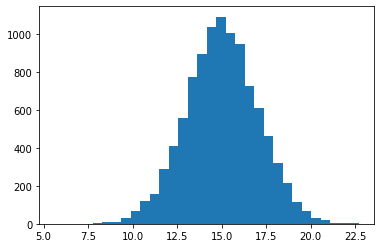

In [14]:
histogram_data = plt.hist(trials,32)

We can now also play with the data to characterize it. For instance, we can calculate mean and standard deviations over sample (mean and std functions), or pecentiles, i.e. fraction of values in the sample which are more/less than X% of all points in the sample

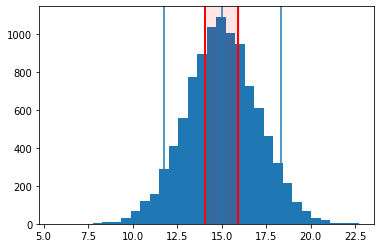

In [15]:
histogram_data = plt.hist(trials,32)
plt.axvline(mean(trials))
plt.axvspan(mean(trials)-std(trials)/2.,mean(trials)+std(trials)/2.,alpha=0.1,fc='r') # the range shows standard deviation over the sample
plt.axvline(percentile(trials,5)) # 5% of values in the sample are below this line
plt.axvline(percentile(trials,95)) # 95% of values in the sample are below this line
plt.axvline(percentile(trials,68),lw=2,c='r') # it's interesting to note 68 percent corresponds to 1 standard deviation
plt.axvline(percentile(trials,100-68),lw=2,c='r') # it's interesting to note 68 percent corresponds to 1 standard deviation


it's interesting to note 68 percent corresponds to 1 standard deviation, i.e. if you know mean and standard deviation over sample, you know that 68% of all values are below mean+std, and 100-68=32% are below mean-std.
This is already a direct link to *probability*. For large-enough samples you can calculate this directly, but if you know underlying distribution, you can also do it for small samples, which is nice.

Note, however, that std/percentile relation above applies only to normal distribution, i.e. will not be satisfied if you have any other distribution of your random variable even if you can still calculate mean and standard deviation!

This point is illustrated below, i.e. we start to complicate things a bit. Obviously, distributions must not always be normal. For instance, you can have a situation when two samples mix. Mean value is now unrelated to either of the two underlying distributions, and standard deviation does not tell you about percentile of points below/above.

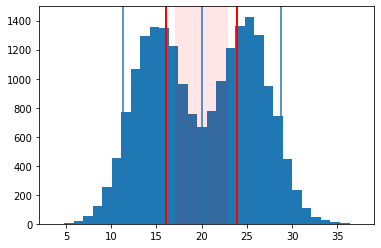

In [7]:
N=10000
# Here we also use concatenate function to glue two sets in one
trials = concatenate((s.norm(loc=15,scale=3).rvs(N),s.norm(loc=25,scale=3).rvs(N)))
# Now we can visualize what we got. One way to do that is plot histogram. Luckily, there's a function for that in pylab
histogram_data = plt.hist(trials,32)
# this function not only plots histogram (i.e. counting how many times each value occured in the sample), 
# but also calculates it and returns as x,y vectors. You can re-use those later if needed
plt.axvline(mean(trials))
plt.axvspan(mean(trials)-std(trials)/2.,mean(trials)+std(trials)/2.,alpha=0.1,fc='r') # the range shows standard deviation over the sample
plt.axvline(percentile(trials,5)) # 5% of values in the sample are below this line
plt.axvline(percentile(trials,95)) # 95% of values in the sample are below this line
plt.axvline(percentile(trials,68),lw=2,c='r') # it's interesting to note 68 percent corresponds to 1 standard deviation
plt.axvline(percentile(trials,100-68),lw=2,c='r') # it's interesting to note 68 percent corresponds to 1 standard deviation



Mind that there are many kinds of distributions you can encounter. Another common one is lognormal distribution, i.e. when $\log{x}$ is distributed normally. This is an exmaple of assymetric distributions where mean value is also a bad indicative of "most probable" value. Instead median appears to be a better approximation (although not ideal). In general, there's no universal magic number to characterize given distribution of a random variable, so ideally before starting any statistical exploration of the data you already need to know what to expect from it and constantly check whether observations agree with prior assumptions. Keep in mind that this can be tricky as visualization of data also affects your perception of it. For instance, below we have two histograms for the same datasets with differently defined bins, and those look quite different. Note that appropriate binning makes it clear that median is indeed a better approximation of the most probable value in this case.

[]

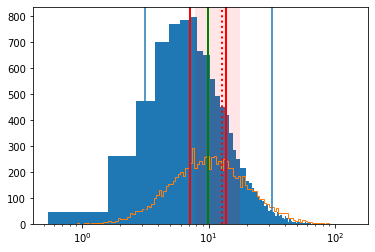

In [8]:
N=10000
# Here we also use concatenate function to glue two sets in one
trials = 10**s.norm(loc=1,scale=0.3).rvs(N)
# Now we can visualize what we got. One way to do that is plot histogram. Luckily, there's a function for that in pylab
histogram_data = plt.hist(trials,128)
different_bins = plt.hist(trials,bins=logspace(log10(min(trials)),log10(max(trials)),128),histtype='step')
# this function not only plots histogram (i.e. counting how many times each value occured in the sample), 
# but also calculates it and returns as x,y vectors. You can re-use those later if needed
plt.axvline(mean(trials),c='r',lw=2,ls='dotted')
plt.axvspan(mean(trials)-std(trials)/2.,mean(trials)+std(trials)/2.,alpha=0.1,fc='r') # the range shows standard deviation over the sample
plt.axvline(percentile(trials,5)) # 5% of values in the sample are below this line
plt.axvline(percentile(trials,95)) # 95% of values in the sample are below this line
plt.axvline(percentile(trials,68),lw=2,c='r') # it's interesting to note 68 percent corresponds to 1 standard deviation
plt.axvline(percentile(trials,100-68),lw=2,c='r') # it's interesting to note 68 percent corresponds to 1 standard deviation
plt.axvline(median(trials),c='g',lw=2)
plt.semilogx()


Now, let's try to do something different. Let's generate trials from single normal distribution again.
That's kind of distribution you most often get when measuring things with random errors. Of course, we can still calculate mean and standard deviation over generated distribution.

In [9]:
trials = s.norm(loc=15,scale=3).rvs(N)
print(mean(trials),std(trials))
# Those are the loc and scale parameters for scipy.stats.norm (here n). Close enough!

15.039772143177792 2.982297370545971


But it's not always like that. Lets now try to play with N and see how it affects the result
These are number of "measurements" in our sample. We use log-spaced points because things stop changing at large Ns

[     10      14      22      32      48      72     108     161     239
     356     529     788    1172    1743    2592    3856    5736    8531
   12689   18873   28072   41753   62101   92367  137382  204335  303919
  452035  672335 1000000]


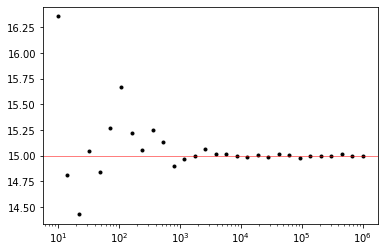

In [10]:
Ns = logspace(1,6,30).astype(int)
print(Ns)
# Those are the "input" parameters for our distribution
loc,scale=15,3
# And now we can draw N samples (which changes from 10 to 1000000) and see how mean value over sample agrees with input
means = [mean(s.norm(loc=loc,scale=scale).rvs(N)) for N in Ns]
plt.semilogx(Ns,means,'k.')
plt.axhline(loc,c='r',lw=0.5)


You see that only for reasonably large Ns we get value close to the input consistently. That's because there are always statistical fluctuations which can bias our estimate of the mean. The goals of statistical analysis are, therefore
* to calculate mean (or other parameter characterizing distribution)
* estimate what is the uncertainty for your calculation  

how to achieve these goals is a long and complex story (many books are written about that), but for us it is important to understand, that similarly to random numbers themselves (i.e. our trials drawn from pre-defined distribution), mean of those numbers is also a random quantity, so what we can do is to make a histogram of means too. Of course, if we can repeat the experiment many times. Let us do that now for single N. Obviously, the means you calculate are random, i.e. you can apply same descriptive statistics etc. If you know distribution of this random variable (and there's math and assumptions for that).

14.490507460282599 15.51489467180879


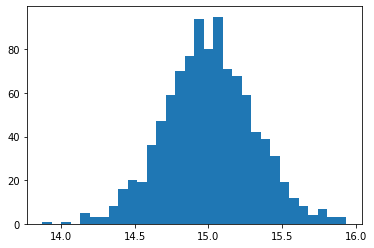

In [11]:
means = [mean(s.norm(loc=loc,scale=scale).rvs(100)) for i in range(1000)]
meanshist = plt.hist(means,32)
print(percentile(means,5),percentile(means,95))

You can also calculate confidence intervals for this variable, i.e. you can say somehting like _"for sample of 100 points drawn from a normal distribution I can calculate mean value. Furthermore, my estimate of the mean will lie between 14.52 and 15.48 in 90% of cases"_ where the nubers come from calculation above. Again, it is often not possible to do such calculation directly, and that's where statistics comes into play. Statistics studies all kinds of distribution like that and provides means of estimating of statistical properties of the sample, and assessing accuracy of those estimates (under certain assumptions). Obviously, taking care that the assumptions used are justified are your responsibility as a scientist, so you need to understand what you are doing. That's why also astronomers need to learn at least basics of statistics.

# Probability and density functions
As discussed in the lecture, probability defines density of possible experiment outcomes in outcome space. In practice, this distribution is most often approximated by one of the fundamental distributions invented by nature or matematitians. In astrophysics, most important distributions are arguably _normal_, _poisson_, and $\chi^2$ distributions (although this depends on area of research). Those were _briefly_ mentioned in the lecture, please see MSMA book for more detail. Here I would like just briefly illustrate how you could play with those (and many others).

In [12]:
import scipy.stats as s
import pylab as plt
from numpy import *

Module implements many distributions (basically every one you could ever need). For each distribution there are several standard methods available such as _.rvs_ (generate numbers), _.pmf/.pdf_ (probability mass/density functions), etc. Meaning of the arguments to be passed (if any) may be different depending on particular distribution but 1) usually rather intuitive, 2) can be looked-up in the documentation. There are also some methods specific to continous/discrete distributions, so in any case you'll need to know your distribution before using _scipy_ implementation! To start things off, let's play a bit with _Bernoulli_ distribution (coin toss). That's initialized with probability for the two choices. We use 0.5, i.e. _fair coint_.

In [ ]:
bernoulli = s.bernoulli(0.5)

Now let's toss the coin 1000 times (that is, generate _random numbers_ from pre-defined distribution), and make a histogram of the results

In [ ]:
plt.hist(bernoulli.rvs(1000))

as you can see, the number of heads/tails is about the same, as expected. Now let's access some of the basic methods of the distribution object. For instance, let's plot the probability mass function (pmf)

In [ ]:
x = plt.linspace(0,1,100)
plt.plot(x,bernoulli.pmf(x))

You see that the probability to draw 0 or 1 from the sample is equal, and equals 0.5 as expected. If we do the same for _unfair coin_, the plot will look different. Note that you can create distributions objects on the fly.

In [ ]:
plt.plot(x,s.bernoulli(0.25).pmf(x))

other essential methods common to most distributions in _scipy_ are _.sf_, _.cdf_, please look up their meaning yourself if that's not obvious.

In [ ]:
plt.plot(x,bernoulli.cdf(x),label='CDF')
plt.plot(x,bernoulli.sf(x),label='SF')
plt.legend(frameon=False)

Of course, you can access other distributions in a similar way. Let's do, for instance same basic plots for normal distribution. Note that I redifined _x_ here. Why?

In [ ]:
normal = s.norm(loc=0,scale=0.5)
plt.subplot(121)
plt.hist(normal.rvs(10000),128)
plt.xlabel('x')
plt.ylabel('N')
plt.subplot(122)
x = plt.linspace(-3,3,100)
plt.plot(x,normal.cdf(x),label='CDF')
plt.plot(x,normal.sf(x),label='SF')
plt.xlabel('x')
plt.ylabel('P')
plt.legend(frameon=False)

as you have probably guessed, _cdf_ and _sf=1-cdf_ are _cumulative distribution function_ and _survival functions_ for the distributions. These are kind of useful if you want to calculate probability that a given number belongs to your distribution: left (probability to draw number less than x from your distribution); right (same, but greater than x), and two-tailed tests (basically probability that x is not coming from your distribution).

In [ ]:
x = 1.38
print("left-tailed p-value %.4f"%normal.cdf(x))
print("right-tailed p-value %.4f"%normal.sf(x))
print("two-tailed p-value %.4f"%(2.0*(1.0-normal.cdf(x))))

## Statistical tests
There are also a number of statistical tests available to verify whether data comes from a given distribution (for instance, _normal_), or check whether two data samples are drawn from the same distribution. Again, please refer to _scipy_ documentation and literature cited there for details. We will cover some of the tests (now and later), but not all. We will also not cover all _caveats_ associated with such testing, but beware that there are **many!**. To start things, let's check if numbers drawn from normal distribution appear like that. Note that the values will change quite a bit if you run simulation many times. **That is just one of the caveats!** 

In [ ]:
loc,scale,N = 0,1,500
random_numbers = s.norm(loc=loc,scale=scale).rvs(N)
print("p-value (reject hypothesis of normal distribution) from Shapiro-Wilk test for normality",s.shapiro(random_numbers).pvalue)
print("p-value (reject hypothesis of normal distribution) from Kolmogorov-Smirronv test (here for normal distribution)",s.kstest(random_numbers,'norm').pvalue)



Comparing random data is hard, and there's an entire statistical field devoted to that. You just need to remember that commonly used statistical tests require some caution in interpretation of their results. For instance, you could check for distribution of _statistics_ (not _p-value_!) returned by the test for simulated data, and determine true _p-value_ under your assumptions. This would allow to calculate _critical levels_ for statistic corresponding to certain _confidence_ levels separating hypotheses. This is done, for instance, in _Andreson-Darling_ test. This test is a modification of KS-test giving more weight to tails of the distribution. Note that critical levels are calculated for **completely specified distribution (i.e. $\mu=0, \sigma=1$ by default)** whereas Wilk test tests against *any* normal distribution. The later test is considered most powerful for normal distributions, btw, but you need to calculate critical levels via simulations (again, for completely specified distribution). 

In [ ]:
anderson = s.anderson(random_numbers)
plt.plot(anderson.significance_level,anderson.critical_values)
plt.axhline(anderson.statistic)
print("Null hypothesis (here normal distribution) can be rejected if test statistic s=%.3f exceeds some critical level (here from %.1f to %.1f)"%(anderson.statistic,anderson.critical_values.min(),anderson.critical_values.max()))

you see that _Anderson_ results appears to be most consistent with the reality (i.e. we test random numbers drawn from a random distribution vs assumption that they are indeed drawn normal and always get a confirmation), whereas KS and Wilk give mixed results. That's however, just because we test against this particular distribution. To get similar result with Shapiro-Wilk, you would need to run a series of simulations determining critical levels.

## Fitting for distribution parameters
Many _scipy.stats_ distributions also have _fit_ method to estimate parameters of a distribution based on a sample of data. Please refer to documentation if you need to understand how this is implemented in each particular case. From practical perspective, see example below:

In [ ]:
loc, scale = 3, 0.1
random_numbers = s.norm(loc=loc,scale=scale).rvs(10) # generate 100 random numbers with mean of 3 and std of 2
locf, scalef = s.norm.fit(random_numbers) # fit for distribution parameters
print("Input parameters mean=%.4f, std=%.4f"%(loc,scale)) # print our input parameters
print("Best-fit parameters using fit method mean=%.4f, std=%.4f"%(locf,scalef)) # print best-fit parameters
print("Simply mean/std calculated directly mean=%.4f, std=%.4f"%(plt.mean(random_numbers),plt.std(random_numbers)))# and directly calculated mean/std


Note that for normal distribution the fit method is actually not that useful because the mean/std calculated in a standard way are not biased for this distribution. However, this might not be the case for heavy-tailed distributions, so be aware that such method exist.

## Limit theorems
Obviously, the most important one is the [CLT](https://en.wikipedia.org/wiki/Central_limit_theorem), which states that sum of independent variables with finite variance (or their mean) follows normal distribution.  We can verify it directly with whatever distribution we can come up with. Let's do it for _uniform_ distribution first (just because we have not discussed it yet). To do that, let's generate a bunch of of uniformly distributed numbers, calculate their mean and compare with normal distribution.

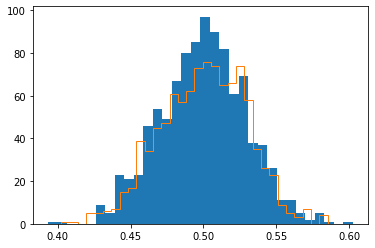

In [28]:
random_numbers = [mean(s.uniform(0,1).rvs(100)) for i in range(1000)]
rr = plt.hist(random_numbers,32)
true_normal_random_numbers = s.norm(loc=mean(random_numbers),scale=std(random_numbers)).rvs(len(random_numbers))
rr = plt.hist(true_normal_random_numbers,histtype='step',bins=32)


Another way to compre them (besides histograms) is to use a non-parametric 2 sample test, like Kolmogorov-Smirnov test

In [29]:
s.ks_2samp(random_numbers,true_normal_random_numbers)

KstestResult(statistic=0.035, pvalue=0.5728904395829821)

The p-value is rather large, so we can reject null hypothesis that distributions are different

We've mentioned in the lecture that _binomial_ distribution has two important limits, i.e. reduces to poisson distribuiton for _np=const_ and _normal_ distribution for _p=const_ (for large _n_ in both cases). So let us verify that! First, let us consider _Poisson_ limit. Here _n_ must be large, and _np~0_. Try to play with _n_ and _p_ to see where approximation breaks! Note that here we use _logpmf_ rather that _pmf_ method as it is more accurate.

expected rate is 1.000


Text(0, 0.5, 'Log(PMF)')

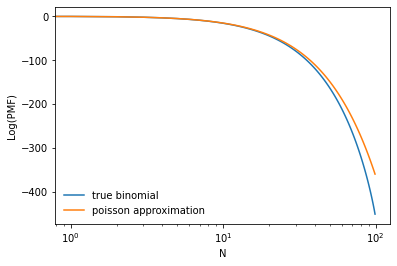

In [30]:
n,p = 100,0.01
poisson_rate = n*p 
print("expected rate is %.3f"%poisson_rate)
plt.plot(range(n),s.binom(n,p).logpmf(range(n)),label='true binomial')
plt.plot(range(n),s.poisson(n*p).logpmf(range(n)),label='poisson approximation')
plt.semilogx()
plt.legend(frameon=False)
plt.xlabel('N')
plt.ylabel('Log(PMF)')



Now, let's move to the other limit, i.e. normal distribution. 

approximate binomial with normal with mu=50.0, sigma=5.0


Text(0, 0.5, 'Log(PMF/PDF)')

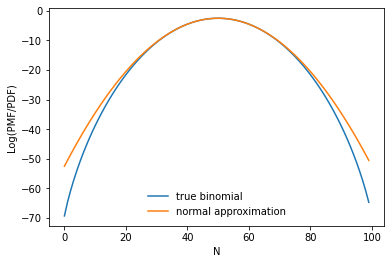

In [31]:
n,p = 100,0.5
mu, sigma = n*p, sqrt(n*p*(1-p))
print("approximate binomial with normal with mu=%.1f, sigma=%.1f"%(mu,sigma))
plt.plot(range(n),s.binom(n,p).logpmf(range(n)),label='true binomial')
plt.plot(range(n),s.norm(loc=mu,scale=sigma).logpdf(range(n)),label='normal approximation')
plt.legend(frameon=False)
plt.xlabel('N')
plt.ylabel('Log(PMF/PDF)')



# Concepts of statistical inference
We touched already the issue of hypothesis testing (i.e. when discussing testing whether data comes from a given distribution above). This topic is, however, much richer, and we can only briefly cover it in the course.

## "Hidden variables" and error propagation
It is not always possible to measure the quantity of interest directly. You can be actually interested in an abstract quantity for which there's in principle no ruler available. Think, for instance, of measuring free-fall acceleration. From basic mechanics you know that $d=\frac{1}{2}gt^2$. You can measure distance (height) and fall time, but not $g$ directly. You can calculate it from the other two, but what will be your uncertainty if you have uncertainty for $d,t$? This question is addressed by _inferential statistics_. The crucial difference is that here you have not simply measurements, but also some model involved which connects your random variables (measurements)

For the case of acceleration mentioned above, the most trivial way to assess uncertainty is just to repeat your experiment many times, calculate $g$ for each realization and then apply your descriptive statistics methods to your result. Let's for now assume that $d=10$, i.e. we drop something from ten meters and just calculate time which it takes to reach the floor. Let's assume that you measure 100 times the time with accuracy of $\sim0.3$ s (average human reaction time). As a result you end-up with a table, and can apply your descriptive statistics methods to the time vector (make histograms, etc). You can also calculate $g=\frac{10}{0.5t^2}$, and apply descriptive statistics to that quantity. Btw, you can try to play with number of experiments here and see if increasing of this number always leads to improvement in $g$ value.

In [ ]:
time = s.norm(loc=sqrt(10/0.5/9.8),scale=0.3).rvs(10)
g_calc = 10/0.5/time**2
tres = plt.hist(time)
plt.xlabel('Time measured,s')
plt.ylabel('Number of experiments')

In [ ]:
gres = plt.hist(g_calc)
print("So, our estimate of g=%.1f+/-%.1f"%(mean(g_calc),std(g_calc)))

Note that the histogram above does not appear _"normal"_, however, so actual estimate of uncertainty will be different. For one, it will be assymetric. This you can address by calculating percentiles over your calculated data:

In [ ]:
gres = plt.hist(g_calc)
glow = percentile(g_calc,5)
ghigh = percentile(g_calc,95)
plt.axvline(glow)
plt.axvline(ghigh)
plt.axvline(mean(g_calc),lw=2)
print("In fact, our g is between %.1f and %1.f, with the best guess at %.1f"%(glow,ghigh,mean(g_calc)))



For complex models (especially involving multiple variables) direct calculation is actually often the most feasible way to assess uncertainties. For simpler cases there's however, simpler way, i.e. _"error propagation"_. Indeed, we can visualize our calculation above by showing correspondence between measured and calculated points. Here the red curve shows the model connecting the variables.

In [ ]:
plt.plot(time,zeros_like(time),'k.')
plt.plot(zeros_like(time),g_calc,'k.')
plt.plot(linspace(0.5,2,100),10/0.5/linspace(0.5,2,100)**2,'r-')
[plt.plot([x,x],[0,10/0.5/x**2],'k-',lw=1) for x in time]
[plt.plot([x+0.05,x+0.05],[0,10/0.5/(x+0.05)**2],'k-',lw=0.5) for x in time]
[plt.plot([0,x],[10/0.5/x**2,10/0.5/x**2],'k-',lw=1) for x in time]
[plt.plot([0,x+0.05],[10/0.5/(x+0.05)**2,10/0.5/(x+0.05)**2],'k-',lw=0.5) for x in time]
plt.ylim(-3,25)

From the plot above you can see that the steeper the model curve, the further apart are calculated values (even if measured values are equaly close). That's natural, and opens a way to estimate uncertainty of the calculated variable even without directly applying descriptive statistics to sample, i.e. _propagate error_. The idea here is that model transforms uncertainty of the observed variable stretching or contracting it depending on how steep the curve connecting the two is. And whenever we talk about of steep/flat curve, we of course remember calculus and derivatives. For our model above, the slope of the curve is $(\frac{10}{0.5t^2})'=-40/x^3$, so any change in $t$ will be amplified by this factor for $g$, i.e. $\Delta g \propto \Delta x/x^3$. Or, in general case, $f_{k}\approx f_{k}^{0}+\sum _{i}^{n}{\frac  {\partial f_{k}}{\partial {x_{i}}}}x_{i}$. If you consider uncertainty as a small perturbation to your variable, you can immideately get (in genral case)

$${\displaystyle s_{f}={\sqrt {\left({\frac {\partial f}{\partial x}}\right)^{2}s_{x}^{2}+\left({\frac {\partial f}{\partial y}}\right)^{2}s_{y}^{2}+\left({\frac {\partial f}{\partial z}}\right)^{2}s_{z}^{2}+\cdots }}}$$

there are many examples of calculation on corresponding [Wikipedia page](https://en.wikipedia.org/wiki/Propagation_of_uncertainty) (basically all simple cases are covered), so please refer to there if in trouble.
